In [2]:
%pip install linregmc
import math
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as polynomial
import linregmc as mc

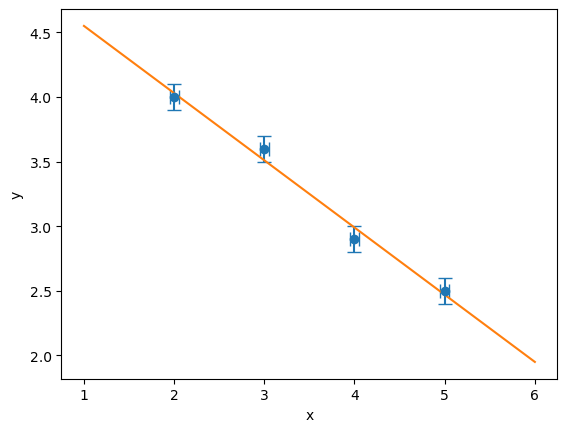

In [3]:
x=np.array([2.0, 3.0, 4.0, 5.0])
y=np.array([4.0,3.6,2.9,2.5])
xsig=0.05
ysig=0.1
p=polynomial.polyfit(x,y,1)
xrange=np.linspace(1,6)
yfit=polynomial.polyval(xrange,p)
plt.errorbar(x,y,xerr=xsig,yerr=ysig,fmt='o', capsize=5)
plt.plot(xrange,yfit,'-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


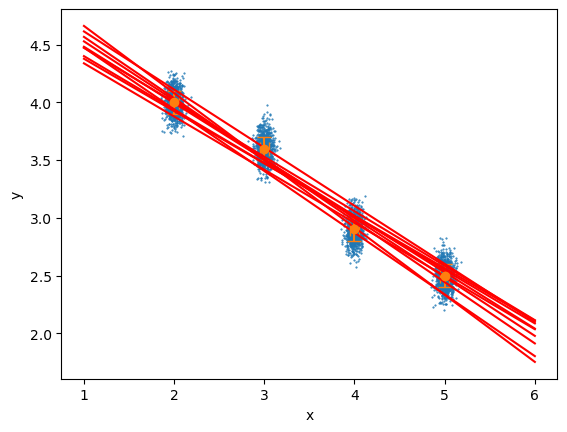

Goodness-of-fit:  0.367


In [6]:
nmc=1000
xmc=mc.addnoise(x,xsig,nmc,'lognorm')
ymc=mc.addnoise(y,ysig,nmc,'lognorm')
pp,psig,pchi2,pmc=mc.linreg(xmc,ymc,1)
plt.plot(xmc.flatten(),ymc.flatten(),'.',markersize=1)   #To see all individual MC points
plt.errorbar(x,y,xerr=xsig,yerr=ysig,fmt='o', capsize=5)
for i in range(10):
    yfit=polynomial.polyval(xrange,pmc[i,:])
    plt.plot(xrange,yfit,'r-')   #To see some individual MC lines
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("Goodness-of-fit: ", pchi2)


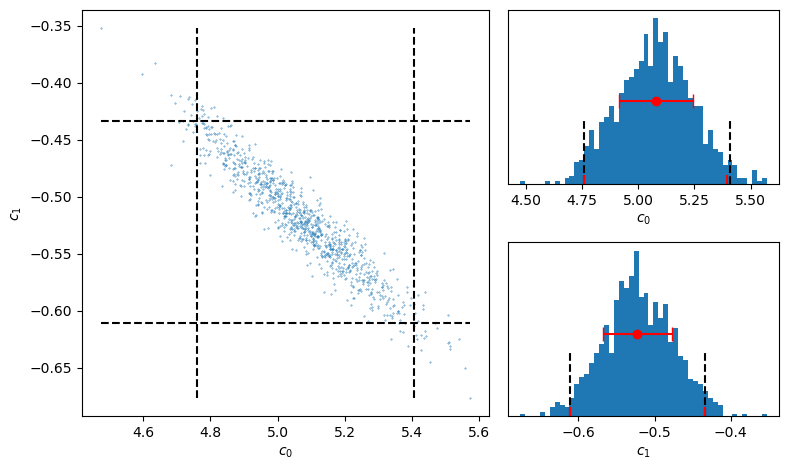

Slope: -0.521 +/- 0.088
Intercept: 5.073 +/- 0.319


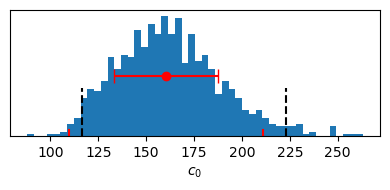

Coverage of f: 116.659 to 222.767


In [8]:

perr,confint=mc.confidence(pmc,0.95,plot=True)
print("Slope: %.3f +/- %.3f"%(pp[1],perr[1]))
print("Intercept: %.3f +/- %.3f"%(pp[0],perr[0]))
f=np.exp(pmc[:,0])
perr,confint=mc.confidence(f,0.95,plot=True)
print("Coverage of f: %.3f to %.3f"%confint)